<h1>    Welcome to the notebook! </h1>
    
<h3>If you are in the interactive version, just hit run on each cell to run it!
    Otherwise just sit down and enjoy!</h3>

In [35]:
# just import, doesnt matter
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

<h1>THIS SECTION IS FOR UNDERSTANDING: WE USE ONLY ONE FILE</h1>

<h2>Here we read the data!
At the moment we read only one file</h2> 

In [179]:
data = []
with open('data/aegeancore2.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            data.append((float(row[0]),float(str(row[1]).replace(',', '.'))))
            line_count += 1
raw_data = np.asarray(data)                  
    #print(f'Processed {line_count} lines.')

Column names are AgeBP, d18O


<h2>Plot the data!</h2>

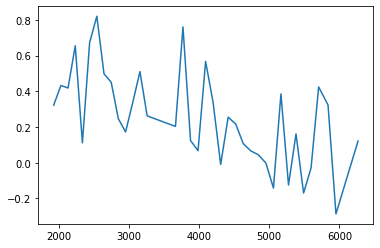

In [34]:
#plotting the raw data
plt.plot(raw_data[:,0], raw_data[:,1])

<h1>Let the magic of interpolation happen</h1>

<h2>But first, we need to set the actual time sampling! How much we want?</h2>

In [96]:
# 5 sample each 200 years?
numbers_of_samples = 10 # change the number here if you want!
year_interval = 200
average_sampling_team = np.mean(raw_data[1:,0]-raw_data[:-1,0])
year_range = raw_data[0,0], raw_data[-1,0]
step_size = (year_interval / numbers_of_samples)
print("this data has an average distance of",average_sampling_team,"years between values", )

this data has an average distance of 120.63888888888889 years between values


<h1>LINEAR INTERPOLATION</h1>

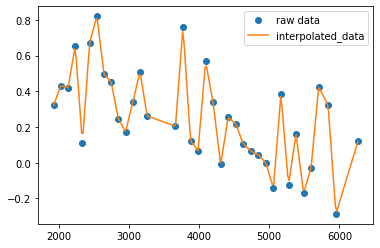

In [148]:
#linear interpolation
linear_f = interpolate.interp1d(raw_data[:,0], raw_data[:,1], kind='linear')
xnew = np.arange(raw_data[0,0], raw_data[-1,0], step_size)
y_linear = linear_f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(raw_data[:,0], raw_data[:,1], 'o', label='raw data')
plt.plot(xnew, y_linear, '-', label='interpolated_data')
plt.legend()

<h1>QUADRATIC INTERPOLATION</h1>

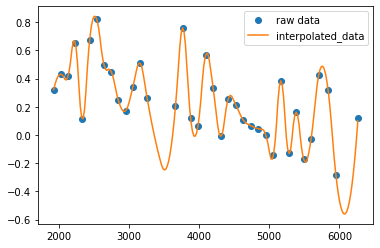

In [149]:
#quadratic interpolation
quadratic_f = interpolate.interp1d(raw_data[:,0], raw_data[:,1], kind='quadratic')
y_quadratic = quadratic_f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(raw_data[:,0], raw_data[:,1], 'o', label='raw data')
plt.plot(xnew, y_quadratic, '-', label='interpolated_data')
plt.legend()

<h2>you can see the difference between 3000 and 4000! It changes a lot! Yet I believe the quadratic is wrong. If you plot them together, you see</h2>

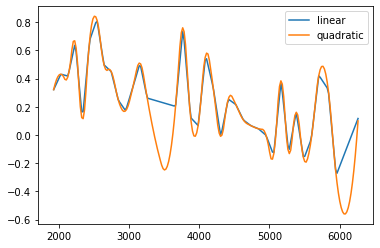

In [146]:
plt.plot(xnew, y_linear, '-', label='linear')
plt.plot(xnew, y_quadratic, '-', label='quadratic')
plt.legend()

<h2>This is what I meant when I talked about different interpolation and the drawing I was trying to make.
Unfortunately, I don't see this as much better. Let's check another one</h2>

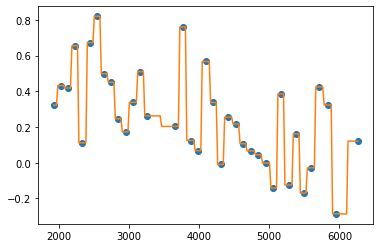

In [102]:
#quadratic interpolation
nearest_n = interpolate.interp1d(raw_data[:,0], raw_data[:,1], kind='nearest')
y_nearest = nearest_n(xnew)   # use interpolation function returned by `interp1d`
plt.plot(raw_data[:,0], raw_data[:,1], 'o', xnew, y_nearest, '-')

<h2>Also, not very satisfactory. Here we should do the work. I will investigate how to re-sample this better. Let's see what we can do</h2>

<h2>Now we can check the z-score</h2>

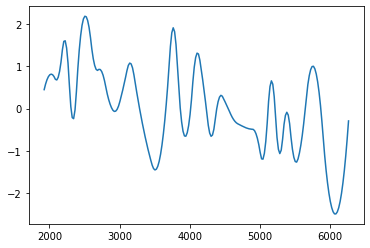

In [136]:
interp_data = y_quadratic # here change if you prefere linear interpolation
mean_value = np.mean(interp_data)
std_dev = np.std(interp_data)
z_score = (interp_data - mean_value ) / std_dev
plt.plot(xnew, z_score, '-')

<h2>What about the z-score with different interpolations?</h2>

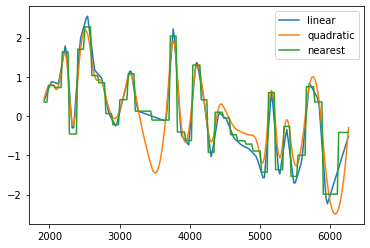

In [137]:
i_q = y_quadratic
i_l = y_linear
i_nn = y_nearest
mean_value = np.mean(i_l)
std_dev = np.std(i_l)
z_linear = (i_l - mean_value ) / std_dev
plt.plot(xnew, z_linear, '-', label="linear")

mean_value = np.mean(i_q)
std_dev = np.std(i_q)
z_quadr = (i_q - mean_value ) / std_dev
plt.plot(xnew, z_quadr, '-', label="quadratic")

mean_value = np.mean(i_nn)
std_dev = np.std(i_nn)
z_near = (i_nn - mean_value ) / std_dev
plt.plot(xnew, z_near, '-', label="nearest")

plt.legend()

<h2>No big difference, apart from the big curve in the 3500. 
Let's pick linear interpolation and quadratic (you can change by changing the code) and throw the data into bins</h2>

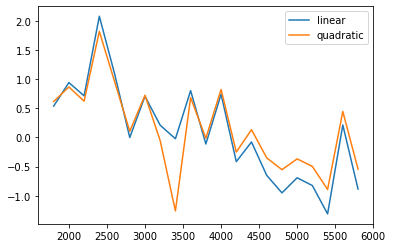

In [144]:
ranges = np.arange(1800, 6200, year_interval)
binned_z_score_linear = []
binned_z_score_quadr = []
for i in range(len(ranges)-1):
    lb = ranges[i]
    ub = ranges[i+1]
    mask = np.logical_and(xnew >= lb, xnew <= ub )
    binned_z_score_linear.append(z_linear[mask].mean())
    binned_z_score_quadr.append(z_quadr[mask].mean())

binned_z_score_linear = np.asarray(binned_z_score_linear)
binned_z_score_quadr = np.asarray(binned_z_score_quadr)
plt.plot(ranges[:-1], binned_z_score_linear, '-', label='linear')
plt.plot(ranges[:-1], binned_z_score_quadr, '-', label='quadratic')
plt.legend()

<h2>ok, there is a slight difference, yet not sure what that means. Let's take a look at all the data together<h2>

<h1>NOW EVERYTHING SEEMS TO WORK! LET'S TRY WITH ALL THE DATA</h1>

In [185]:
import os
big_data = []
name_for_plotting = []
filenames = os.listdir('data')
for filename in filenames:
    if filename[0] == ".":
        continue
    else:
        name_for_plotting.append(filename[:-4])
        data_cur_file = []
        print("reading", name_for_plotting[-1])
        full_path_file = "{}/{}".format('data',filename)
        with open(full_path_file) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=';')
            line_count = 0
            for row in csv_reader:
                if line_count == 0:
                    #print(f'Column names are {", ".join(row)}')
                    line_count += 1
                else:
                    age = str(row[0]).replace(',', '.')
                    isotop = str(row[1]).replace(',', '.')
                    data_cur_file.append((float(age), float(isotop)))
                    line_count += 1

        cur_data = np.asarray(data_cur_file)    
        big_data.append(cur_data)
big_data = np.asarray(big_data)  
print(big_data.shape)

reading levantcore2
reading levant
reading akgol
reading bafa
reading aegeancore2
reading marmarasea
reading sofular_tr
reading mavri_gr
reading aegean
reading jeita
reading soreq
reading nar
reading acigol
(13,)


<h1>PLOT ALL THE DATA!</h1>
<h2>Just random, without z-score, or bin or whatever, just to take a look</h2>

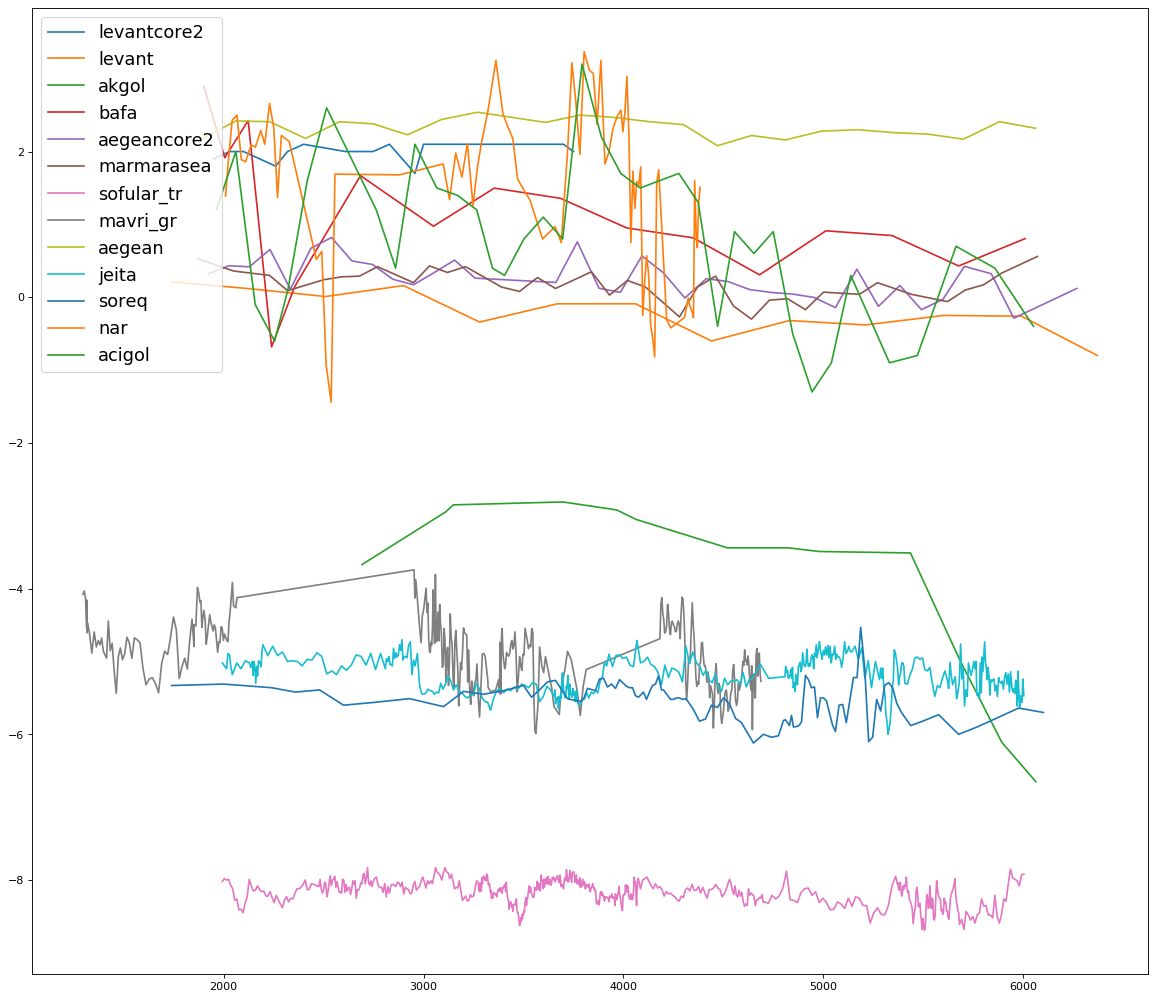

In [192]:
plt.figure(figsize=(18, 16), dpi= 80)
for j in range(len(big_data)):
    plt.plot(big_data[j][:,0], big_data[j][:,1], label=name_for_plotting[j])
plt.legend(fontsize=16)

In [305]:
def resample_data(big_data, years_interval, number_of_samples_per_interval, time_interval, which_interp):
    step_size = (years_interval / number_of_samples_per_interval)
    print("using a step size of", step_size)
    interp_big_data = []
    for j in range(len(big_data)):
        cur_raw_data = big_data[j]
        first_year_data = np.ceil(cur_raw_data[0,0] / years_interval) * years_interval
        last_year_data = np.floor(cur_raw_data[-1,0] / years_interval) * years_interval
        starting_year = max(time_interval[0], first_year_data)
        final_year = min(time_interval[1], last_year_data)
        x_new = np.arange(starting_year, final_year, step_size)
        #print(x_new)
        interp_cur_data = np.zeros((x_new.shape[0], 2))
        #print(cur_raw_data[:,0])
        #print("Dimension of x", cur_raw_data[:,0].ndim, "different from 1:", cur_raw_data[:,0].ndim != 1)
        #print("Any big number: ",np.any(cur_raw_data[:,0][1:] <= cur_raw_data[:,0][:-1]))
        #if np.any(cur_raw_data[:,0][1:] <= cur_raw_data[:,0][:-1]):
        #    for i in range(cur_raw_data[:,0].shape[0]-1):
        #        print(i,"-->",cur_raw_data[:,0][i],"<",cur_raw_data[:,0][i+1])
        #        if cur_raw_data[:,0][i] > cur_raw_data[:,0][i+1]:
        #            print(i,"-->HIER-->",cur_raw_data[:,0][i],">",cur_raw_data[:,0][i+1])
        interp_f = interpolate.interp1d(cur_raw_data[:,0], cur_raw_data[:,1], kind=which_interp)
        interp_cur_data[:,1] = np.asarray(interp_f(x_new))
        interp_cur_data[:,0] = np.asarray(x_new)
        interp_big_data.append(interp_cur_data)
    return (interp_big_data)
        

In [194]:
def plot_big_data(big_data, name_for_plotting):
    plt.figure(figsize=(18, 16), dpi= 80)
    for j in range(len(big_data)):
        plt.plot(big_data[j][:,0], big_data[j][:,1], label=name_for_plotting[j])
    plt.legend(fontsize=16)

<h2>We can resample data and show it, it won't change much, but it helps following each step</h2>

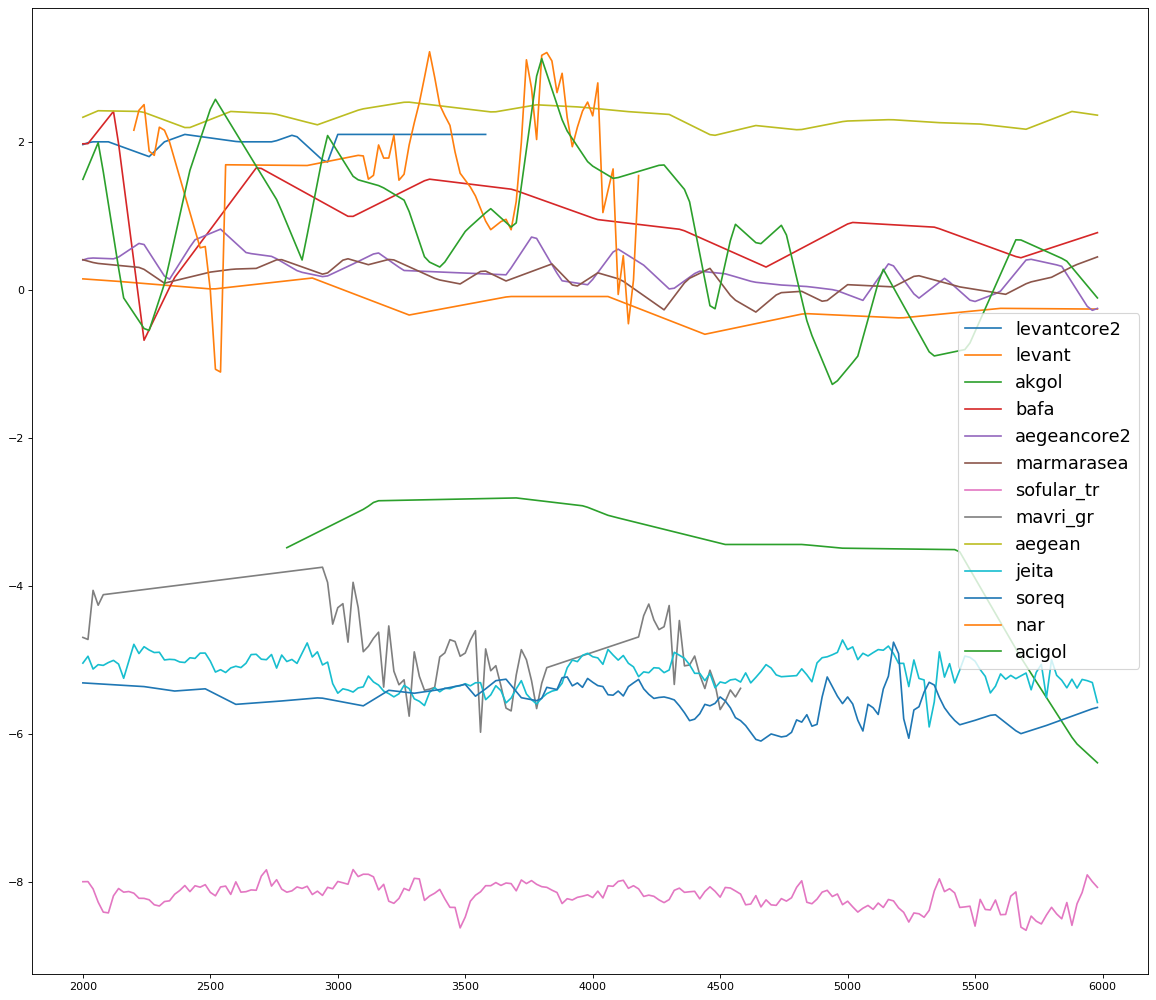

In [257]:
years_interval = 200 # each 200 years
number_of_samples_per_interval = 10 # ten values each 200 years
which_interp = 'linear' # linear interpolation
time_interval = [2000, 6000] # time span
interpolated_data = resample_data(big_data, 
                                  years_interval, 
                                  number_of_samples_per_interval, 
                                  time_interval, 
                                  which_interp)
plot_big_data(interpolated_data, name_for_plotting)

<h2>Now the real question is: do these parameters actually change something?</h2>
<h3>Let's check by changing one and plotting side-by-side</h3>

In [268]:
def subplot_big_data(big_data, name_for_plotting, subplot_pos):
    plt.subplot(subplot_pos[0], subplot_pos[1], subplot_pos[2])
    for j in range(len(big_data)):
        plt.plot(big_data[j][:,0], big_data[j][:,1], label=name_for_plotting[j])
    #plt.legend(fontsize=16)

Text(0.5, 1.0, '20 Samples per 200 years')

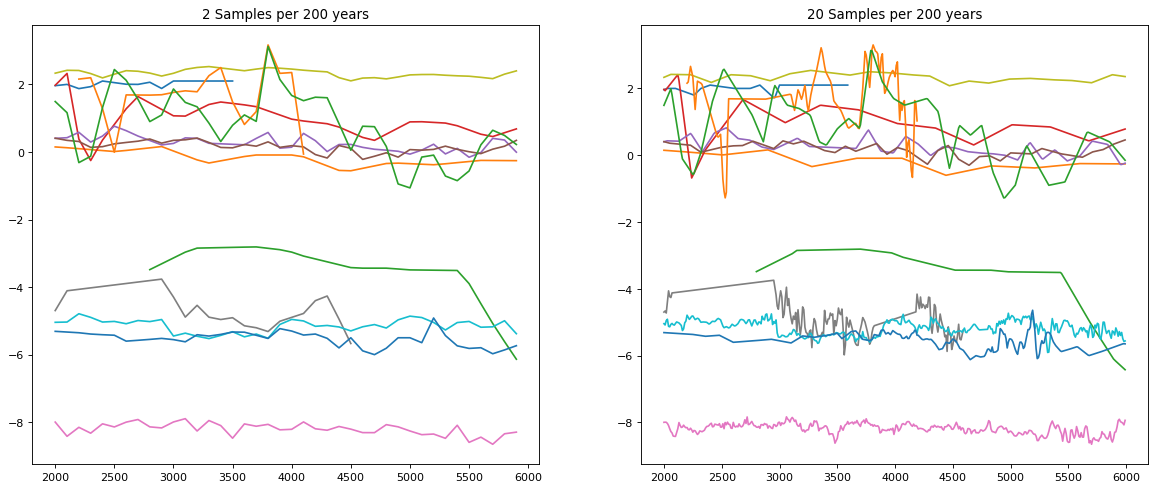

In [269]:
plt.figure(figsize=(18, 16), dpi= 80)
#LEFT SIDE
years_interval = 200 # each 200 years
number_of_samples_per_interval = 2 # ten values each 200 years
which_interp = 'linear' # linear interpolation
time_interval = [2000, 6000] # time span
interpolated_data = resample_data(big_data, 
                                  years_interval, 
                                  number_of_samples_per_interval, 
                                  time_interval, 
                                  which_interp)
subplot_big_data(interpolated_data, name_for_plotting, (2,2,1))
plt.title('2 Samples per 200 years')
#RIGHT SIDE
years_interval = 200 # each 200 years
number_of_samples_per_interval = 20 # ten values each 200 years
which_interp = 'linear' # linear interpolation
time_interval = [2000, 6000] # time span
interpolated_data = resample_data(big_data, 
                                  years_interval, 
                                  number_of_samples_per_interval, 
                                  time_interval, 
                                  which_interp)
subplot_big_data(interpolated_data, name_for_plotting, (2,2,2))
plt.title('20 Samples per 200 years')

<h3>Here we changed number of samples. What about the years interval?</h3>

Text(0.5, 1.0, '10 Samples per 400 years')

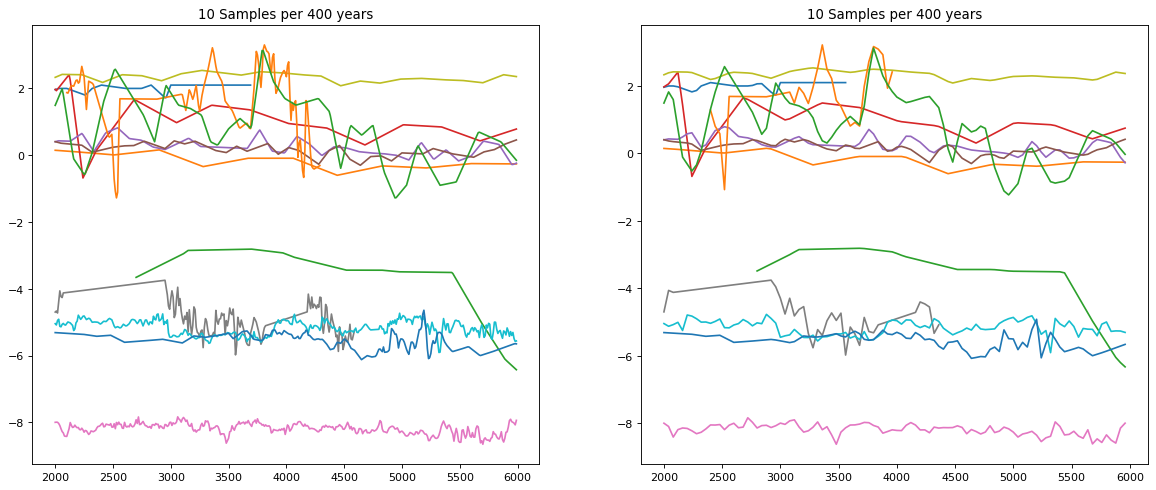

In [271]:
plt.figure(figsize=(18, 16), dpi= 80)
#LEFT SIDE
years_interval = 100 # each 200 years
number_of_samples_per_interval = 10 # ten values each 200 years
which_interp = 'linear' # linear interpolation
time_interval = [2000, 6000] # time span
interpolated_data = resample_data(big_data, 
                                  years_interval, 
                                  number_of_samples_per_interval, 
                                  time_interval, 
                                  which_interp)
subplot_big_data(interpolated_data, name_for_plotting, (2,2,1))
plt.title('10 Samples per 400 years')
#RIGHT SIDE
years_interval = 400 # each 200 years
number_of_samples_per_interval = 10 # ten values each 200 years
which_interp = 'linear' # linear interpolation
time_interval = [2000, 6000] # time span
interpolated_data = resample_data(big_data, 
                                  years_interval, 
                                  number_of_samples_per_interval, 
                                  time_interval, 
                                  which_interp)
subplot_big_data(interpolated_data, name_for_plotting, (2,2,2))
plt.title('10 Samples per 400 years')

<h3>Mmmmh. Interesting. Something changes but I have no idea what is better. Let's check interpolation just for fun</h3>


using a step size of 40.0
using a step size of 40.0


Text(0.5, 1.0, '5 Samples per 200 years - NEAREST NEIGHBOUR')

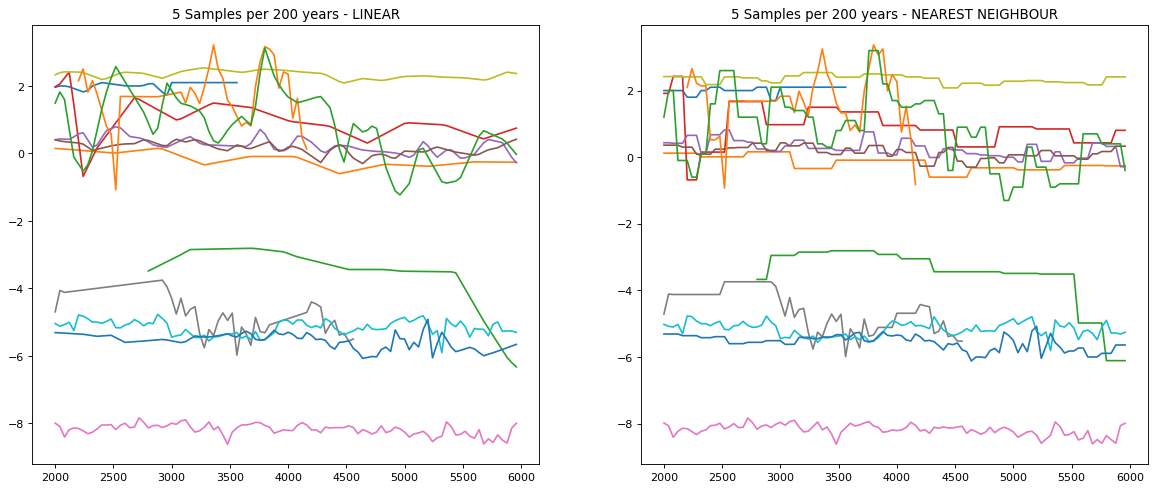

In [312]:
plt.figure(figsize=(18, 16), dpi= 80)
#LEFT SIDE
years_interval = 200 # each 200 years
number_of_samples_per_interval = 5 # ten values each 200 years
which_interp = 'linear' # linear interpolation
time_interval = [2000, 6000] # time span
interpolated_data = resample_data(big_data, 
                                  years_interval, 
                                  number_of_samples_per_interval, 
                                  time_interval, 
                                  which_interp)
subplot_big_data(interpolated_data, name_for_plotting, (2,2,1))
plt.title('5 Samples per 200 years - LINEAR')
#RIGHT SIDE
years_interval = 200 # each 200 years
number_of_samples_per_interval = 5 # ten values each 200 years
which_interp = 'nearest' # linear interpolation
time_interval = [2000, 6000] # time span
interpolated_data = resample_data(big_data, 
                                  years_interval, 
                                  number_of_samples_per_interval, 
                                  time_interval, 
                                  which_interp)
subplot_big_data(interpolated_data, name_for_plotting, (2,2,2))
plt.title('5 Samples per 200 years - NEAREST NEIGHBOUR')

<h2>What if we resample yearly?</h2>

using a step size of 1.0


Text(0.5, 1.0, '1 Samples per year - LINEAR')

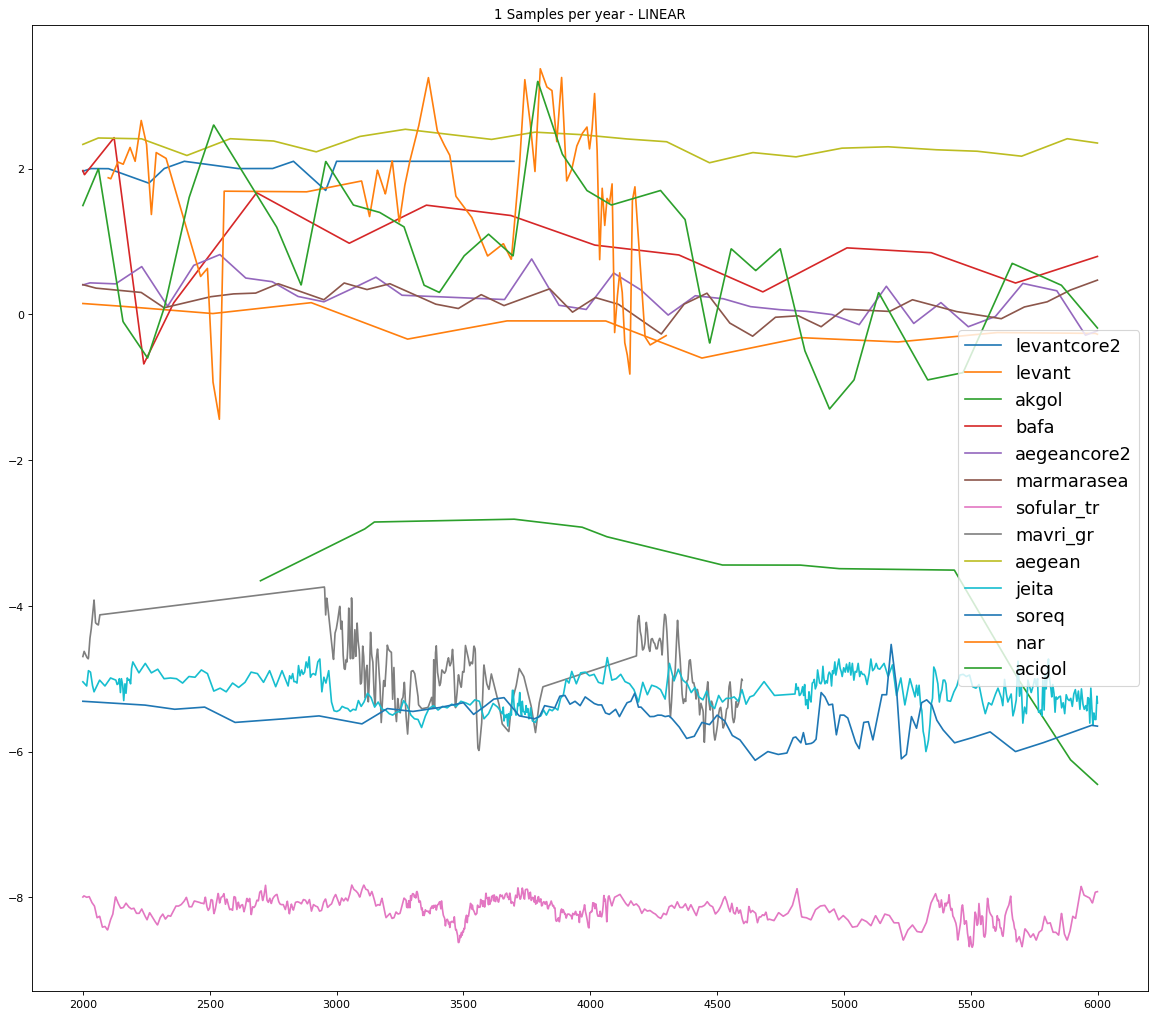

In [314]:
years_interval = 100 # each 200 years
number_of_samples_per_interval = 100 # ten values each 200 years
which_interp = 'linear' # linear interpolation
time_interval = [2000, 6000] # time span
interpolated_data = resample_data(big_data, 
                                  years_interval, 
                                  number_of_samples_per_interval, 
                                  time_interval, 
                                  which_interp)
plot_big_data(interpolated_data, name_for_plotting)
plt.title('1 Samples per year - LINEAR')

<h2>Still no clue. Let's go to the z-score</h2>

In [318]:
def calculate_z_score(big_data):
    bigZ = []
    for h in range(len(big_data)):
        cur_raw_data = big_data[h]
        mean_value = np.mean(cur_raw_data[:,1])
        std_dev = np.std(cur_raw_data[:,1])
        z_ = (cur_raw_data[:,1] - mean_value ) / std_dev
        z_score = np.zeros((cur_raw_data.shape))
        z_score[:,0] = cur_raw_data[:,0]
        z_score[:,1] = z_
        bigZ.append(z_score)
    return np.asarray(bigZ)

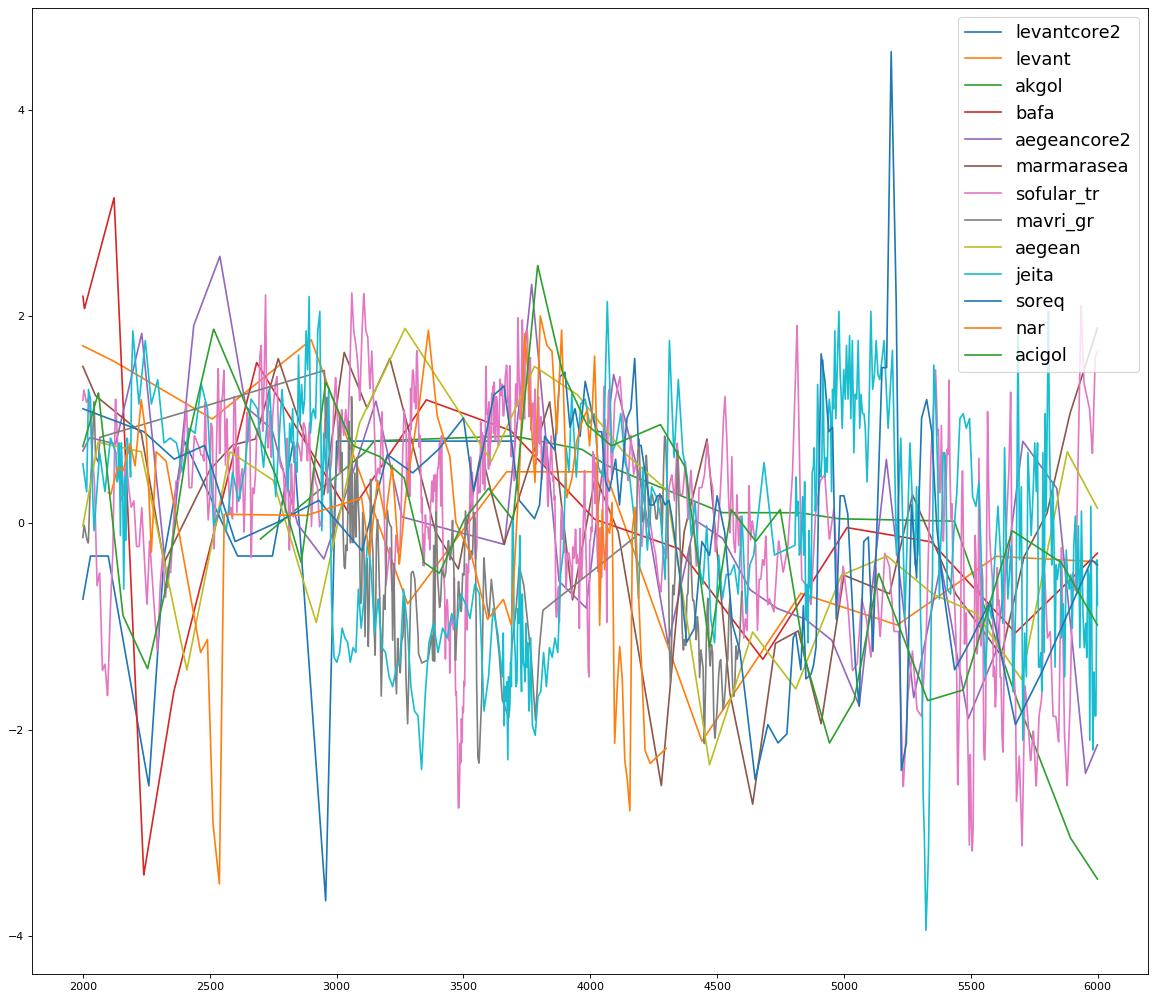

In [322]:
z_scores = calculate_z_score(interpolated_data)
plot_big_data(z_scores, name_for_plotting)

<h3>Caos! Is there a different between raw and interpolated data?</h3>

Text(0.5, 1.0, 'INTERPOLATED DATA')

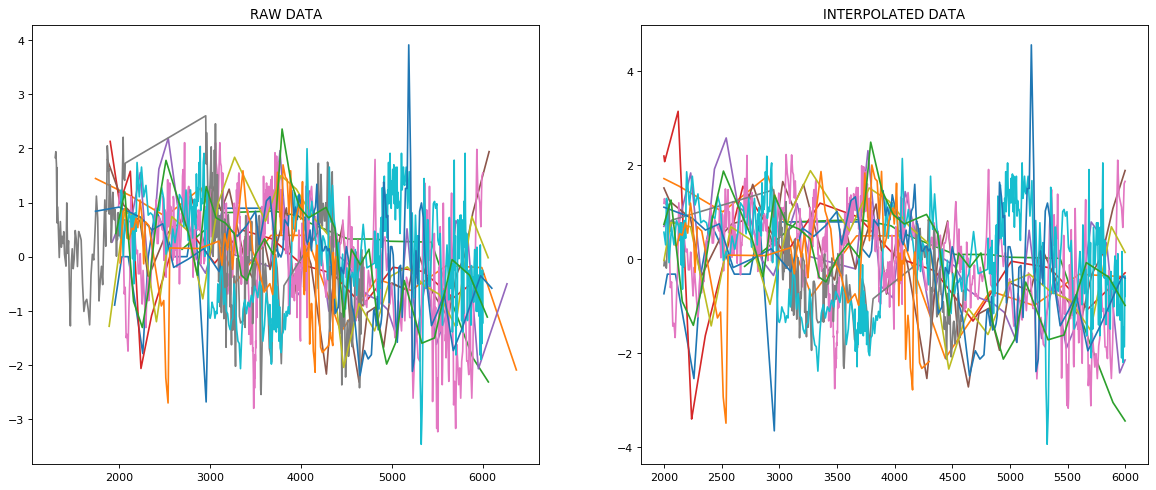

In [325]:
plt.figure(figsize=(18, 16), dpi= 80)
z_scores = calculate_z_score(big_data)
subplot_big_data(z_scores, name_for_plotting, (2,2,1))
plt.title("RAW DATA")
z_scores = calculate_z_score(interpolated_data)
subplot_big_data(z_scores, name_for_plotting, (2,2,2))
plt.title("INTERPOLATED DATA")

<h3>Puah! Very small. Let's bin the data</h3>

In [345]:
def bin_the_data(big_data, data_range, interval):
    ranges = np.arange(data_range[0], data_range[1], interval)
    
    binned_big_z = []
    for h in range(len(big_data)):
        binned_z_score = []
        binned_x = []
        for i in range(len(ranges)-1):
            cur_z_score = big_data[h][:,1]
            x_z_score = big_data[h][:,0]
            lb = ranges[i]
            ub = ranges[i+1]
            mask = np.logical_and(x_z_score >= lb, x_z_score <= ub )
            if np.sum(np.abs(cur_z_score[mask]))>0:
                binned_z_score.append(cur_z_score[mask].mean())
            else:
                binned_z_score.append(0.)
            binned_x.append((ub+lb/2))
        
        binned_z_scores = np.zeros((len(binned_z_score),2))
        binned_z_scores[:,0] = np.asarray(binned_x)
        binned_z_scores[:,1] = np.asarray(binned_z_score)
        binned_big_z.append(binned_z_scores)
        
    return np.asarray(binned_big_z)

Text(0.5, 1.0, 'BINNED Z-SCORES')

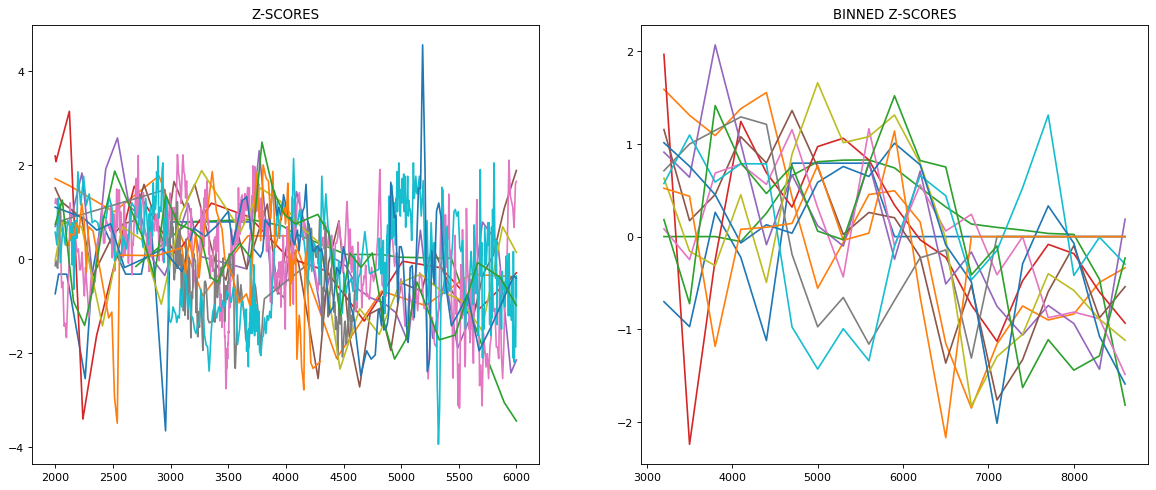

In [346]:
plt.figure(figsize=(18, 16), dpi= 80)
subplot_big_data(z_scores, name_for_plotting, (2,2,1))
plt.title("Z-SCORES")
bin_z_scores = bin_the_data(z_scores, [2000, 6000], 200)
subplot_big_data(bin_z_scores, name_for_plotting, (2,2,2))
plt.title("BINNED Z-SCORES")

<h3>Much better! What about changing the window size? - the interval of the bins</h3>

Text(0.5, 1.0, 'BINNED Z-SCORES each 400 Years')

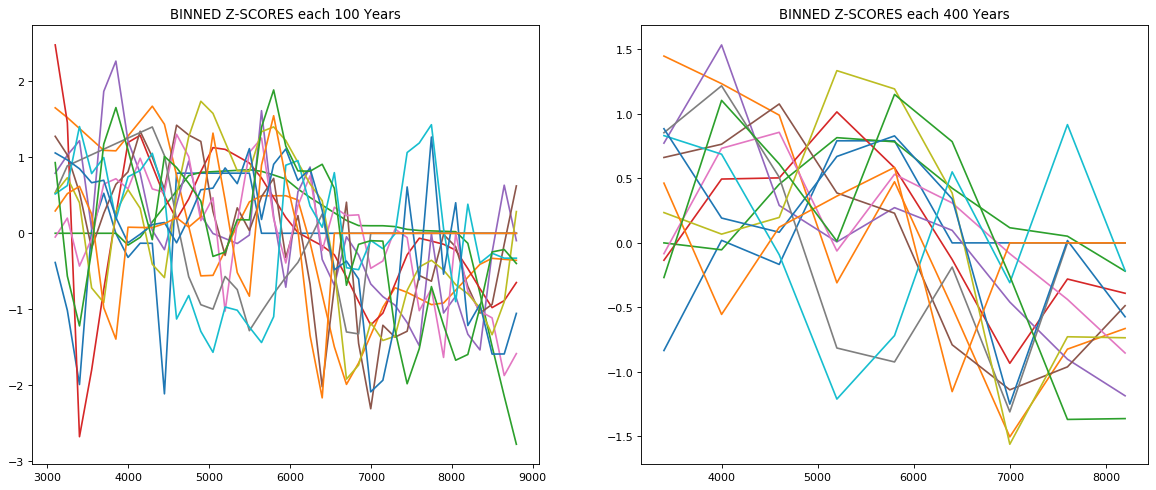

In [347]:
plt.figure(figsize=(18, 16), dpi= 80)
bin_z_scores = bin_the_data(z_scores, [2000, 6000], 100)
subplot_big_data(bin_z_scores, name_for_plotting, (2,2,1))
plt.title("BINNED Z-SCORES each 100 Years")
bin_z_scores = bin_the_data(z_scores, [2000, 6000], 400)
subplot_big_data(bin_z_scores, name_for_plotting, (2,2,2))
plt.title("BINNED Z-SCORES each 400 Years")

<h3>Yeah, it does look that 200 is the best guess here. 100 (on the left) seems very chaotic, 400 (on the right) oversmoothed</h3>

<h2>Now, we should look for pattern. I am not sure exactly which pattern we should look for.

First idea that comes to mind is to cluster different series, and the algorithm should be able to distinguish regions.

We need to take care, we should not subsequence one sequence and cluster that, because it seems to be meaningless! look [here](https://towardsdatascience.com/dont-make-this-mistake-when-clustering-time-series-data-d9403f39bbb2) for an article about it or [here](http://www.cs.ucr.edu/~eamonn/meaningless.pdf) for the real paper! 

On the other side, clustering different series still has meaning, so we can try that. Los geht's</h3>

In [348]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(bin_z_scores)

ValueError: Found array with dim 3. Estimator expected <= 2.